In [1]:
import pandas as pd

# 读入文件，并显示头几行
df_ads = pd.read_csv('../data/advertising.csv')
df_ads.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# corr()是DataFrame的一个方法，用于计算各个变量之间的相关性。它返回一个相关性矩阵，其中每个元素表示两个变量之间的相关性。
df_ads.corr().head()

,wechat,weibo,others,sales
wechat,1.000000,0.054801,0.056644,0.901204
weibo,0.054801,1.000000,0.354104,0.349631
others,0.056644,0.354104,1.000000,0.157960
sales,0.901204,0.349631,0.157960,1.000000


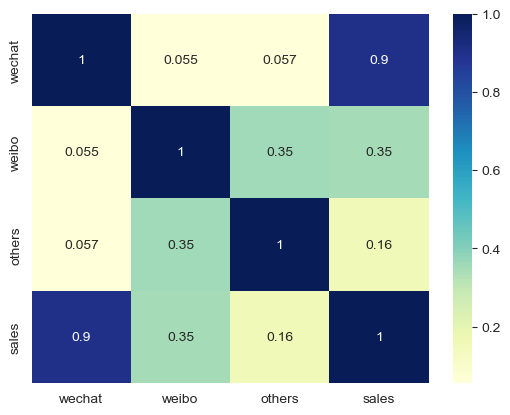

In [3]:
# heatmap用于绘制热力图。在这里，它接收一个DataFrame（df_ads）的相关性矩阵作为输入
sns.heatmap(df_ads.corr(), annot=True, cmap='YlGnBu')
plt.show()

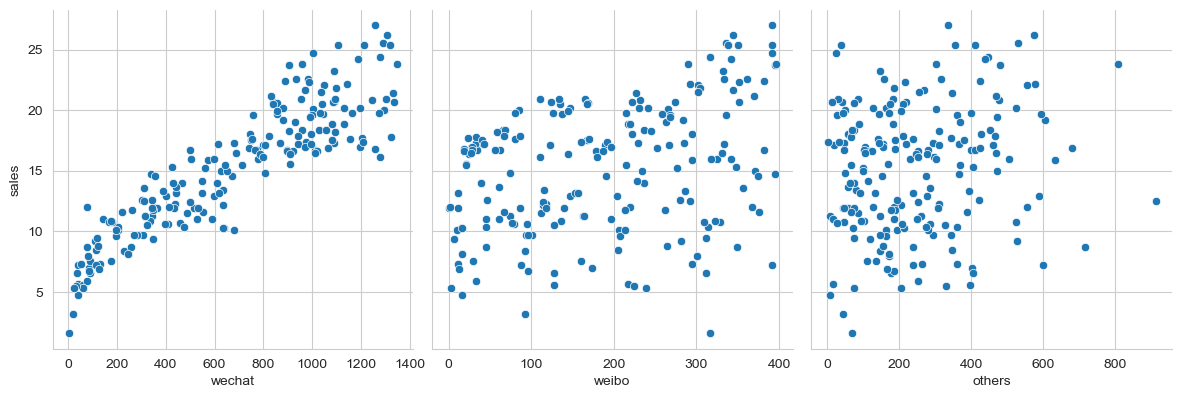

In [4]:
# 显示销量和各种广告投放量的散点图
# x_vars 指定了在散点图矩阵中显示的自变量（独立变量）
# y_vars 指定了因变量（依赖变量），即在散点图矩阵中显示在y轴上的变量
# height=4和aspect=1是用于设置散点图矩阵的高度和宽高比
# kind='scatter'表示创建散点图矩阵
sns.pairplot(df_ads, x_vars=['wechat', 'weibo', 'others'],
             y_vars='sales',
             height=4, aspect=1, kind='scatter')
plt.show()

In [5]:
import numpy as np

X = np.array(df_ads.wechat)  #构建特征集，只有微信广告一个特征
y = np.array(df_ads.sales)  #构建标签集，销售金额
print("张量X的阶:", X.ndim)
print("张量X的形状:", X.shape)
# print("张量X的内容:", X)

张量X的阶: 1
张量X的形状: (200,)


In [6]:
X = X.reshape(-1, 1)  #通过reshape函数把向量转换为矩阵
y = y.reshape(-1, 1)  #通过reshape函数把向量转换为矩阵
print("张量X的阶:", X.ndim)
print("张量X的形状:", X.shape)

张量X的阶: 2
张量X的形状: (200, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
type(X_train)

numpy.ndarray

In [8]:
# 定义归一化函数
def scaler(train: np.ndarray, test: np.ndarray) -> [np.ndarray, np.ndarray]:
    min = train.min(axis=0)
    max = train.max(axis=0)
    gap = max - min
    train -= min
    train /= gap
    test -= min
    test /= gap
    return train, test

In [9]:
X_train, X_test = scaler(X_train, X_test)
y_train, y_test = scaler(y_train, y_test)

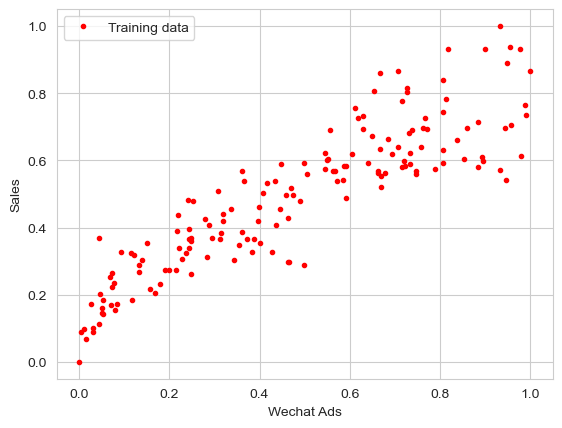

In [10]:
# r.：表示使用红色点表示
plt.plot(X_train, y_train, 'r.', label='Training data')
plt.xlabel('Wechat Ads')  # x轴Label
plt.ylabel('Sales')  # y轴Label
plt.legend()  # 显示图例
plt.show()  # 显示绘图结果

In [11]:
# 定义损失函数
def cost_function(X: np.ndarray, y: np.ndarray, w: int, b: int):
    y_hat = X * w + b
    loss = y_hat - y
    cost = np.sum(loss ** 2) / len(X)  #均方误差函数的实现
    return cost

In [12]:
print("当权重5，偏置3时，损失为：", cost_function(X_train, y_train, w=5, b=3))
print("当权重100，偏置1时，损失为：", cost_function(X_train, y_train, w=100, b=1))

当权重5，偏置3时，损失为： 25.592781941560116
当权重100，偏置1时，损失为： 3155.918523006111


In [13]:
def gradient_descent(X: np.ndarray, y: np.ndarray, w: int, b: int, lr: int, iterations: int):
    """线性回归的梯度下降"""
    l_history = np.zeros(iterations)  # 初始化记录梯度下降过程中损失的数组
    w_history = np.zeros(iterations)
    b_history = np.zeros(iterations)
    for iter in range(iterations):
        y_hat = w * X + b
        loss = y_hat - y
        # 因为X和loss维度一样，要求点积的话，需要将其中一个转置
        derivative_weight = X.T.dot(loss) / len(X) * 2  # 对权重(均方误差函数)求导，len(X)就是数据集样本数N
        derivative_bias = sum(loss) * 1 / len(X) * 2  # 对偏置求导，len(X)就是数据集样本数N
        w = w - lr * derivative_weight  # 结合下降速率alpha更新权重
        b = b - lr * derivative_bias  # 结合下降速率alpha更新偏置
        l_history[iter] = cost_function(X, y, w, b)  # 梯度下降过程中损失的历史 
        w_history[iter] = w  # 梯度下降过程中权重的历史
        b_history[iter] = b  # 梯度下降过程中偏置的历史 
    return l_history, w_history, b_history

In [14]:
def predict(weight, bias, X):  # 定义预测函数
    """定义线性回归的预测函数"""
    y_hat = weight * X + bias  # 这是假设函数,其中已经应用了Python的广播功能
    return y_hat  # 返回预测分类的结果

In [15]:
def linear_regression(X, y, weight, bias, alpha, iterations):
    """定义线性回归模型 - 核心就是调用梯度下降"""
    loss_history, weight_history, bias_history = gradient_descent(X, y, weight, bias, alpha, iterations)
    print("训练最终损失：", loss_history[-1])
    y_pred = predict(weight_history[-1], bias_history[-1], X)  #进行预测
    traning_acc = 100 - np.mean(np.abs(y_pred - y)) * 100
    print("线性回归训练准确率: {:.2f}%".format(traning_acc))  # 打印准确率
    return loss_history, weight_history, bias_history  # 返回训练历史记录

In [16]:
# 首先确定参数的初始值
iterations = 500;  # 迭代500次
alpha = 0.5;  #学习速率设为1,0.5和0.01，分别试一下
weight = -5  # 权重
bias = 3  # 偏置
# 计算一下初始权重和偏置值所带来的损失
print('当前损失：', cost_function(X_train, y_train, weight, bias))

当前损失： 2.687591069813268


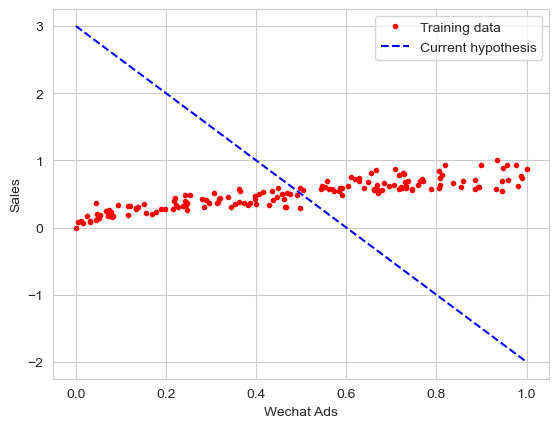

In [17]:
# 绘制当前的函数模型
plt.plot(X_train, y_train, 'r.', label='Training data')
# 生成一个包含500个元素的等差数列，作为绘制拟合函数的X值域。X_train.min()和X_train.max()分别表示训练集输入特征的最小值和最大值。
line_X = np.linspace(X_train.min(), X_train.max(), 500)  # X值域
line_y = [weight * xx + bias for xx in line_X]  # 假设函数y_hat
plt.plot(line_X, line_y, 'b--', label='Current hypothesis')  # 显示当前拟合函数
plt.xlabel('Wechat Ads')  # x轴Label
plt.ylabel('Sales')  # y轴Label
plt.legend()  # 显示图例
plt.show()  # 显示绘图，可以看到当前的拟合函数跟实际情况相差较远

训练最终损失： 0.009312952135151986
线性回归训练准确率: 92.28%
loss_history shape: (500,)


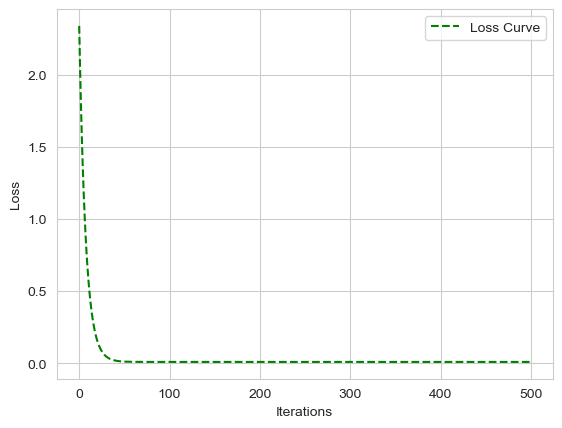

In [18]:
# 根据初始参数值，进行梯度下降，也就是开始训练机器，拟合函数
loss_train, weight_history, bias_history = linear_regression(X_train, y_train, weight, bias, alpha, iterations)
print("loss_history shape:", loss_train.shape)
plt.plot(loss_train, 'g--', label='Loss Curve')
plt.xlabel('Iterations')  # x轴Label
plt.ylabel('Loss')  # y轴Label
plt.legend()  # 显示图例
plt.show()  # 显示损失曲线

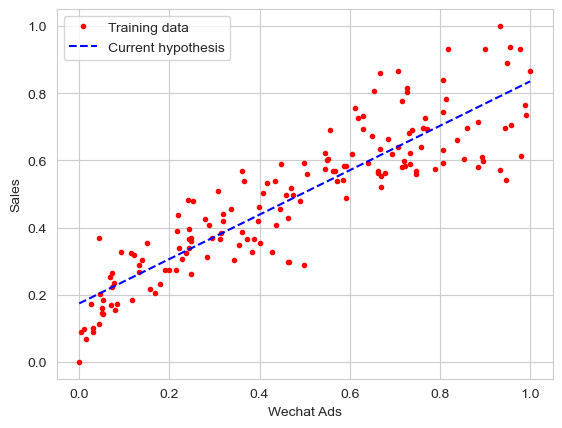

In [19]:
# 绘制当前的函数模型
plt.plot(X_train, y_train, 'r.', label='Training data')  # 显示训练集散点图
line_X = np.linspace(X_train.min(), X_train.max(), 500)  # X值域
# 关于weight_history[-1],这里的索引[-1]，我们讲过，就代表迭代500次后的最后一个W值
line_y = [weight_history[-1] * xx + bias_history[-1] for xx in line_X]  # 假设函数y_hat
plt.plot(line_X, line_y, 'b--', label='Current hypothesis')  # 显示当前拟合函数
plt.xlabel('Wechat Ads')  # x轴Label
plt.ylabel('Sales')  # y轴Label
plt.legend()  # 显示图例
plt.show()  # 显示绘图

In [20]:
print('当前损失：', cost_function(X_train, y_train, weight_history[-1], bias_history[-1]))
print('当前权重：', weight_history[-1])
print('当前偏置：', bias_history[-1])

当前损失： 0.009312952135151986
当前权重： 0.6608381748731955
当前偏置： 0.17402747570052432


In [21]:
print('测试集损失：', cost_function(X_test, y_test, weight_history[-1], bias_history[-1]))

测试集损失： 0.009068113079114393


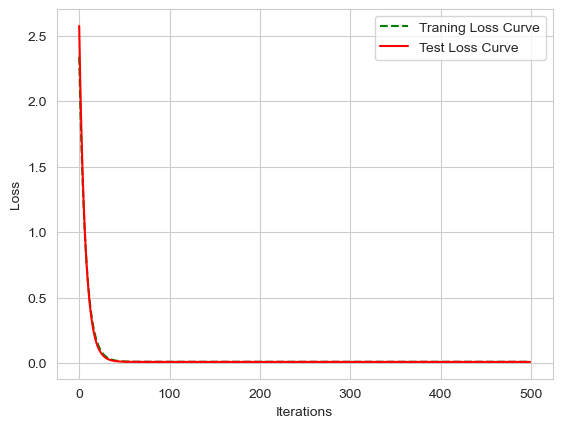

In [22]:
# 同时绘制训练集和测试集损失曲线
loss_test, a, b = gradient_descent(X_test, y_test, weight, bias, alpha, iterations)
plt.plot(loss_train, 'g--', label='Traning Loss Curve')
plt.plot(loss_test, 'r', label='Test Loss Curve')
plt.xlabel('Iterations')  # x轴Label
plt.ylabel('Loss')  # y轴Label
plt.legend()  # 显示图例
plt.show()

In [23]:
# 设计Contour Plot动画
# 老实说这个就有点高端了，目前还驾驭不了
import matplotlib.animation as animation

theta0_vals = np.linspace(-2, 3, 100)
theta1_vals = np.linspace(-3, 3, 100)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        weight = element
        bias = element2
        J_vals[t1, t2] = cost_function(X_train, y_train, weight, bias)

J_vals = J_vals.T
A, B = np.meshgrid(theta0_vals, theta1_vals)
C = J_vals

fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(X_train, y_train, 'ro', label='Training data')
plt.title('Sales Prediction')
plt.axis([X_train.min() - X_train.std(), X_train.max() + X_train.std(), y_train.min() - y_train.std(),
          y_train.max() + y_train.std()])
plt.grid(axis='both')
plt.xlabel("WeChat Ads Volumn (X1) ")
plt.ylabel("Sales Volumn (Y)")
plt.legend(loc='lower right')

line, = plt.plot([], [], 'b-', label='Current Hypothesis')
annotation = plt.text(-2, 3, '', fontsize=20, color='green')
annotation.set_animated(True)

plt.subplot(122)
cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('Bias')
plt.ylabel('Weight')
track, = plt.plot([], [], 'r-')
point, = plt.plot([], [], 'ro')

plt.tight_layout()
plt.close()


def init():
    line.set_data([], [])
    track.set_data([], [])
    point.set_data([], [])
    annotation.set_text('')
    return line, track, point, annotation


def animate(i):
    fit1_X = np.linspace(X_train.min() - X_train.std(), X_train.max() + X_train.std(), 1000)
    fit1_y = bias_history[i] + weight_history[i] * fit1_X

    fit2_X = bias_history.T[:i]
    fit2_y = weight_history.T[:i]

    track.set_data(fit2_X, fit2_y)
    line.set_data(fit1_X, fit1_y)
    point.set_data(bias_history.T[i], weight_history.T[i])

    annotation.set_text('Cost = %.4f' % (loss_history[i]))
    return line, track, point, annotation


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps=500)

/var/folders/dm/f56zxw7j1rqc97w8f43rc06c0000gn/T/ipykernel_25624/445399917.py:64: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(bias_history.T[i], weight_history.T[i])



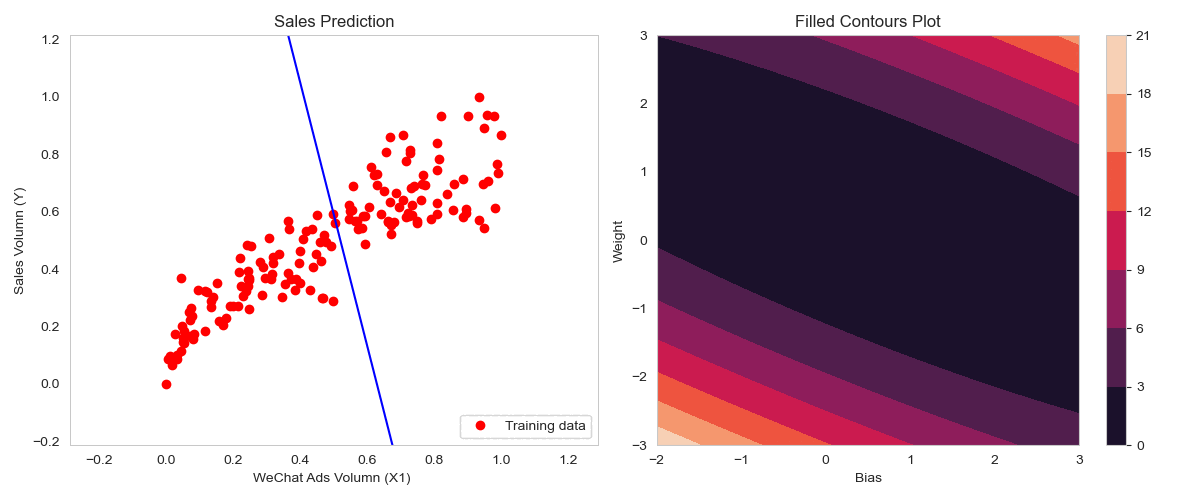

In [24]:
# 显示Contour Plot动画
# 在pycharm中运行，需要安装imagemagick，然后在命令行中输入：magick -version
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
display(HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii'))))